In [123]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing

### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [124]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [125]:
# Fonte: 

df = pd.read_excel("jogo.xlsx")

In [126]:
deletar = df.loc[((df.Global_Sales.fillna(0)) == 0) & ((df.Total_Shipped.fillna(0)) == 0)]
a = deletar.index
dados = df.drop(a)

In [127]:
dados["Sales"] = dados["Global_Sales"].fillna(0) + dados["Total_Shipped"].fillna(0)

In [128]:


dados = dados.drop(columns = ["Global_Sales","Total_Shipped","url","status","img_url","NA_Sales" ,"PAL_Sales","JP_Sales" ,"Other_Sales","VGChartz_Score"])


In [129]:
dados = dados.fillna(0)

# Análise Exploratória

0.2724554544459939

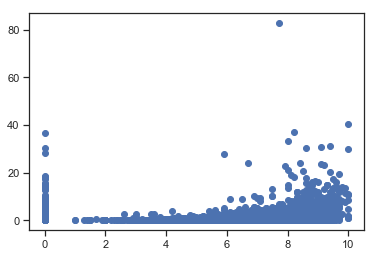

In [130]:
plt.scatter(dados.Critic_Score,dados.Sales);
dados.Critic_Score.corr(dados.Sales)

In [131]:
dados.Genre.values

array(['Sports', 'Platform', 'Racing', ..., 'Fighting', 'Adventure',
       'Adventure'], dtype=object)

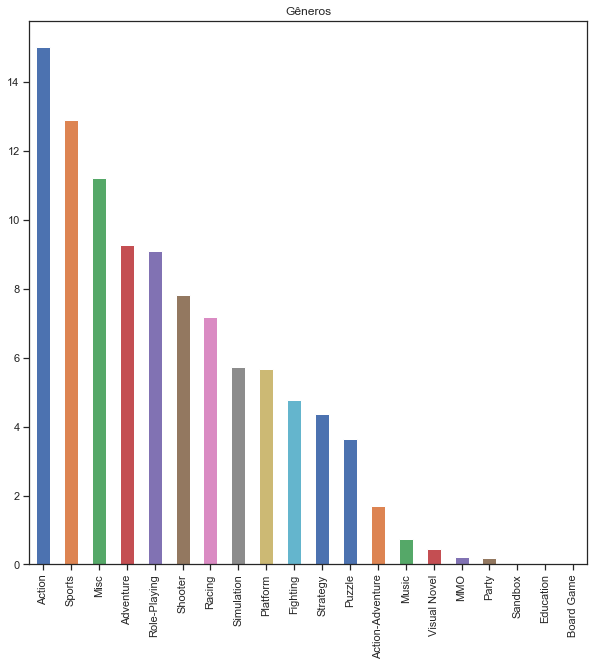

In [132]:
generos = dados.Genre.value_counts(True)*100
generos
plot = generos.plot(kind="bar",title="Gêneros",figsize = (10,10))

In [133]:
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

In [134]:
dados.Genre = dados.Genre.astype('category')
dados.ESRB_Rating = dados.ESRB_Rating.astype('category')
dados.Platform = dados.Platform.astype('category')
dados.Publisher = dados.Publisher.astype('category')
dados.Developer = dados.Developer.astype('category')


In [135]:
data = dados.loc[:,quantitativas]

In [136]:
x_vars = ['Critic_Score',
       'User_Score','Vgchartzscore','Sales']
y_vars = x_vars

C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


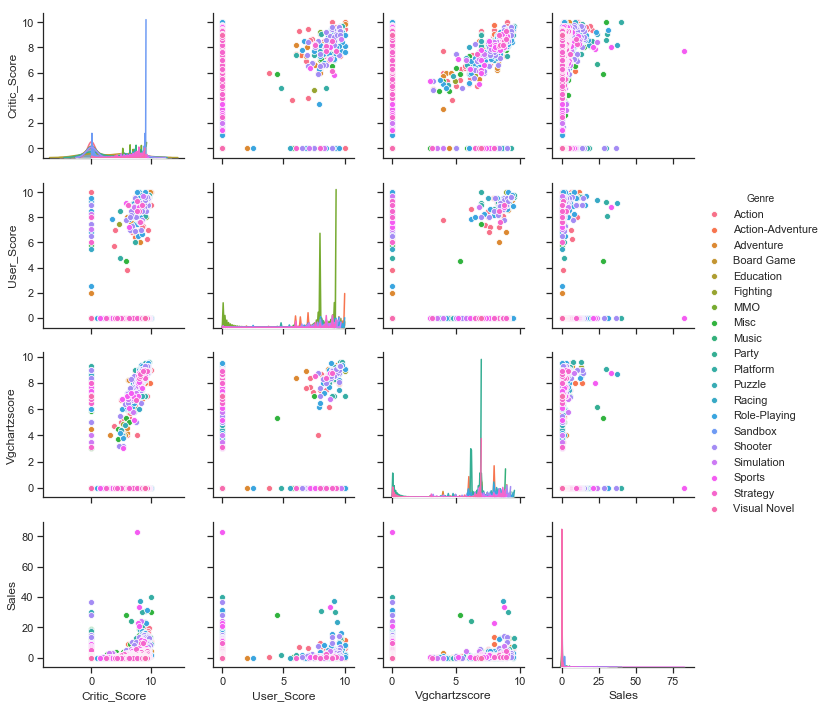

In [137]:
sns.set(style="ticks")

sns.pairplot(dados, hue="Genre", x_vars=x_vars, y_vars=y_vars)

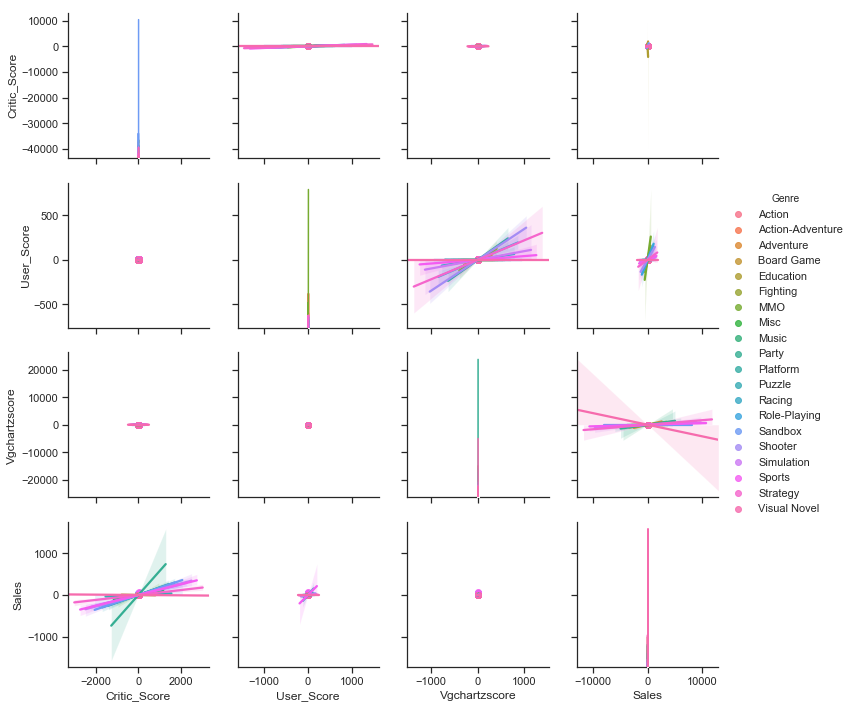

In [138]:
sns.pairplot(dados, hue="Genre", kind="reg", x_vars=x_vars, y_vars=y_vars)

In [19]:
qualitativas = ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer']
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

In [20]:
# Separaremos as preditoras
quant_x = quantitativas.copy()
quant_x.remove('Sales')
np.asarray(dados)

array([[1, 'Wii Sports', 'wii-sports', ..., nan, nan, 82.86],
       [2, 'Super Mario Bros.', 'super-mario-bros', ..., nan, nan, 40.24],
       [3, 'Mario Kart Wii', 'mario-kart-wii', ..., '11th Apr 18', 8.7,
        37.14],
       ...,
       [19860, 'Ashita no Joe 2: The Anime Super Remix',
        'ashita-no-joe-2-the-anime-super-remix', ..., nan, nan, 0.01],
       [19861, 'Tokyo Yamanote Boys for V: Main Disc',
        'tokyo-yamanote-boys-for-v-main-disc', ..., nan, nan, 0.01],
       [19862, 'NadePro!! Kisama no Seiyuu Yatte Miro!',
        'nadepro-kisama-no-seiyuu-yatte-miro', ..., nan, nan, 0.01]],
      dtype=object)

In [21]:
results = regress(((dados.loc[:, quant_x]).fillna(0)).astype(float), dados.Sales)

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1076.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:33:39   Log-Likelihood:                -34736.
No. Observations:               19821   AIC:                         6.948e+04
Df Residuals:                   19815   BIC:                         6.953e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2970      0.781      1.661      0.097      -0.233       2.827
Rank             -0.0001   1.85e-06    -54.667      0.000      -0.000   -9.77e-05
Critic_Score      0.0564      0.003     16.331      0.000       0.050       0.063
User_Score        0.1963      0.011     17.510      0.000       0.174       0.218
Vgchartzscore     0.0351      0.009      4.099      0.000       0.018       0.052
Year           5.755e-05      0.000      0.148      0.882      -0.001       0.001
==============================================================================
Omnibus:                    43081.143   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        450906098.289
Skew:                          19.348   Prob(JB):                         0.00
Kurtosis:                     740.886   Cond. No.                     9.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
quant_x2 = quant_x.copy()
quant_x2.remove('Year')

In [25]:
results2 = regress(((dados.loc[:, quant_x2]).fillna(0)).astype(float), dados.Sales)

In [26]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1345.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:33:45   Log-Likelihood:                -34736.
No. Observations:               19821   AIC:                         6.948e+04
Df Residuals:                   19816   BIC:                         6.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4124      0.023     60.540      0.000       1.367       1.458
Rank             -0.0001   1.85e-06    -54.702      0.000      -0.000   -9.77e-05
Critic_Score      0.0564      0.003     16.332      0.000       0.050       0.063
User_Score        0.1963      0.011     17.512      0.000       0.174       0.218
Vgchartzscore     0.0352      0.009      4.102      0.000       0.018       0.052
==============================================================================
Omnibus:                    43081.001   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        450898343.584
Skew:                          19.348   Prob(JB):                         0.00
Kurtosis:                     740.880   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [28]:
res = dummify(dados, ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer'])


In [29]:
z = res.drop(columns=quantitativas)


In [30]:
quant_x2.extend(z)
quant_x2.remove("Rank")
quant_x2.remove("Name")
quant_x2.remove("basename")
quant_x2.remove("Last_Update")

In [31]:
results_dummy = regress(((res.loc[:,quant_x2]).fillna(0)).astype(float), res.Sales)

In [32]:
results_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     3.295
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:35:55   Log-Likelihood:                -31269.
No. Observations:               19821   AIC:                         7.032e+04
Df Residuals:                   15932   BIC:                         1.010e+05
Df Model:                        3888                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                              0.0374      0.714      0.052      0.958      -1.362       1.437
Critic_Score                                                                       0.0782      0.004     19.300      0.000       0.070       0.086
User_Score                                                                         0.1679      0.012     14.216      0.000       0.145       0.191
Vgchartzscore                                                                      0.0517      0.009      5.746      0.000       0.034       0.069
Genre_Action                                                                       0.0736      0.109      0.673      0.501      -0.141       0.288
Genre_Action-Adventure                                                             0.1284      0.140      0.917      0.359      -0.146       0.403
Genre_Adventure                                                                   -0.1090      0.113     -0.968      0.333      -0.330       0.112
Genre_Board Game                                                                   0.0848      0.930      0.091      0.927      -1.739       1.909
Genre_Education                                                                   -1.4829      1.257     -1.179      0.238      -3.948       0.982
Genre_Fighting                                                                     0.2996      0.121      2.469      0.014       0.062       0.537
Genre_MMO                                                                          0.0953      0.285      0.334      0.738      -0.463       0.654
Genre_Misc                                                                         0.0972      0.111      0.876      0.381      -0.120       0.315
Genre_Music                                                                        0.0636      0.173      0.368      0.713      -0.275       0.402
Genre_Party                                                                        0.0731      0.295      0.248      0.804      -0.505       0.652
Genre_Platform                                                                     0.1102      0.116      0.948      0.343      -0.118       0.338
Genre_Puzzle                                                                      -0.1974      0.124     -1.590      0.112      -0.441       0.046
Genre_Racing                                                                       0.1378      0.118      1.165      0.244      -0.094       0.370
Genre_Role-Playing                                                                 0.1709      0.115      1.490      0.136      -0.054       0.